In [1]:
from glob import glob 

result_root_dir = "/workspace/data/results"

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)
from scipy.stats import mode

def pkl_load(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

# 모든 모델 결과 로드
pkl_files = glob(f"{result_root_dir}/*.pkl")
results_dict = {}

for pkl_file in pkl_files:
    model_name = pkl_file.split('/')[-1].split('.')[0]
    pkl_dict = pkl_load(pkl_file)
    results_dict[model_name] = pkl_dict
    print(f"✓ {model_name} 로드 완료")



✓ models_comparison_downsample 로드 완료
✓ models_comparison_downsample_SMOTEEN 로드 완료
✓ models_comparison_baseline 로드 완료
✓ models_comparison_downsample_ADASYN 로드 완료
✓ models_comparison_oversample_ADASYN 로드 완료
✓ models_comparison_oversample_SMOTE 로드 완료
✓ models_comparison_downsample_SMOTETomek 로드 완료
✓ models_comparison_oversample_SMOTEEN 로드 완료
✓ models_comparison_downsample_SMOTE 로드 완료
✓ models_comparison_oversample_SMOTETomek 로드 완료


## Top 3 모델-샘플링 조합 비교

🏆 Top 3 모델-샘플링 조합 (ROC AUC 기준)


,ROC_AUC,ROC_AUC_std,F1,F1_std,Balanced_Accuracy,Balanced_Accuracy_std,Precision,Precision_std,Recall,Recall_std,Specificity,Specificity_std,Accuracy,Accuracy_std,MCC,MCC_std
Combination,,,,,,,,,,,,,,,,
GradientBoosting - downsample_SMOTEEN,"0.921 [0.906, 0.936]",0.012048,"0.783 [0.758, 0.808]",0.020112,"0.808 [0.789, 0.828]",0.015590,"0.904 [0.847, 0.961]",0.046062,"0.693 [0.639, 0.747]",0.043461,"0.923 [0.867, 0.979]",0.045031,"0.808 [0.789, 0.828]",0.015590,"0.636 [0.594, 0.677]",0.033283
RandomForest - baseline,"0.921 [0.910, 0.932]",0.008700,"0.362 [0.255, 0.468]",0.085730,"0.607 [0.569, 0.644]",0.030277,"0.947 [0.906, 0.988]",0.033054,"0.227 [0.146, 0.308]",0.065192,"0.987 [0.977, 0.996]",0.007454,"0.607 [0.569, 0.644]",0.030277,"0.327 [0.261, 0.393]",0.053075
RandomForest - downsample,"0.921 [0.913, 0.928]",0.006175,"0.373 [0.174, 0.572]",0.160034,"0.610 [0.532, 0.688]",0.063026,"0.903 [0.818, 0.988]",0.068407,"0.247 [0.081, 0.412]",0.133542,"0.973 [0.955, 0.992]",0.014907,"0.610 [0.532, 0.688]",0.063026,"0.315 [0.176, 0.453]",0.111611



상세 통계


,ROC_AUC_mean,ROC_AUC_std,F1_mean,F1_std,Balanced_Accuracy_mean,Balanced_Accuracy_std,Precision_mean,Recall_mean,Accuracy_mean,MCC_mean
Combination,,,,,,,,,,
GradientBoosting - downsample_SMOTEEN,0.920944,0.012048,0.783066,0.020112,0.808333,0.015590,0.904114,0.693333,0.808333,0.635761
RandomForest - baseline,0.920833,0.008700,0.361715,0.085730,0.606667,0.030277,0.947027,0.226667,0.606667,0.326881
RandomForest - downsample,0.920778,0.006175,0.373177,0.160034,0.610000,0.063026,0.903177,0.246667,0.610000,0.314529



순위

🥇 1위: GradientBoosting - downsample_SMOTEEN
   ROC AUC: 0.9209 [0.9060, 0.9359]
   F1 Score: 0.7831 [0.7581, 0.8080]
   Balanced Accuracy: 0.8083 [0.7890, 0.8277]
   MCC: 0.6358 [0.5944, 0.6771]

🥇 2위: RandomForest - baseline
   ROC AUC: 0.9208 [0.9100, 0.9316]
   F1 Score: 0.3617 [0.2553, 0.4682]
   Balanced Accuracy: 0.6067 [0.5691, 0.6443]
   MCC: 0.3269 [0.2610, 0.3928]

🥇 3위: RandomForest - downsample
   ROC AUC: 0.9208 [0.9131, 0.9284]
   F1 Score: 0.3732 [0.1745, 0.5719]
   Balanced Accuracy: 0.6100 [0.5317, 0.6883]
   MCC: 0.3145 [0.1759, 0.4531]

시각화


/tmp/ipykernel_238627/1537571035.py:196: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_238627/1537571035.py:196: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


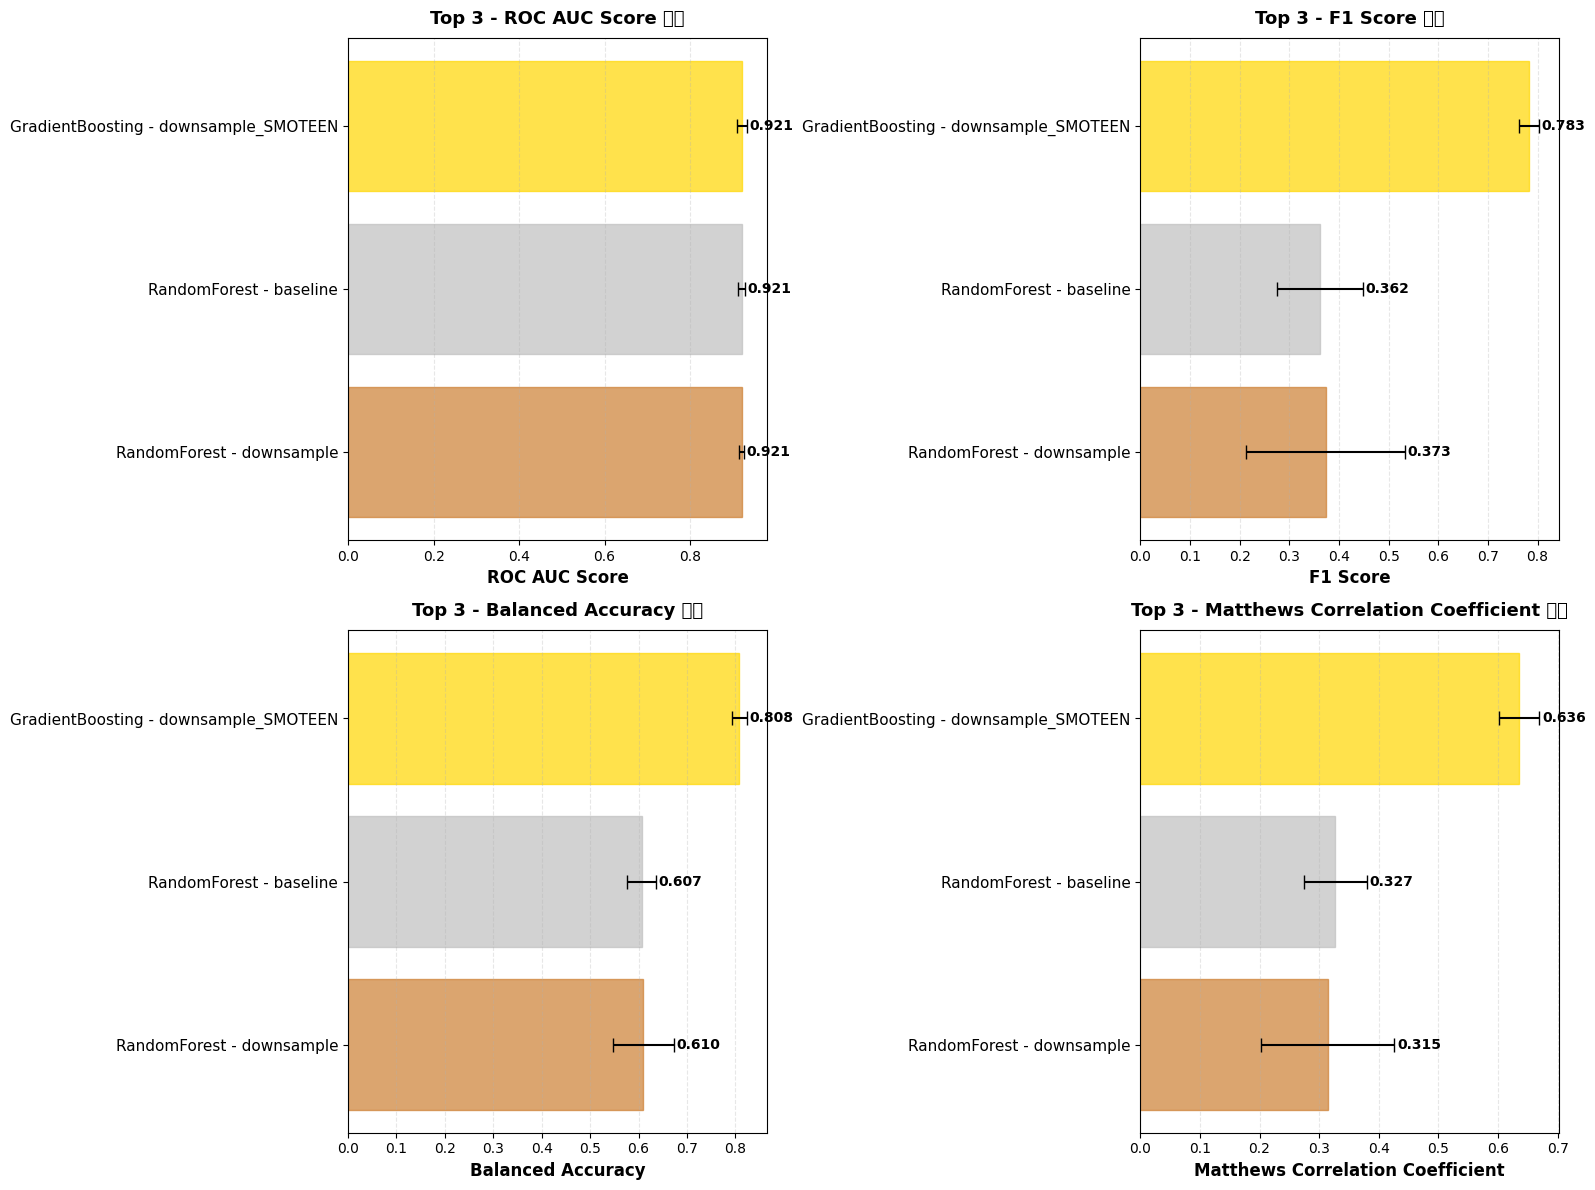


종합 메트릭 비교:


/tmp/ipykernel_238627/1537571035.py:237: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_238627/1537571035.py:237: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_238627/1537571035.py:237: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_238627/1537571035.py:237: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_238627/1537571035.py:237: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_238627/1537571035.py:237: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_238627/1537571035.py:237: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from font(s) Deja

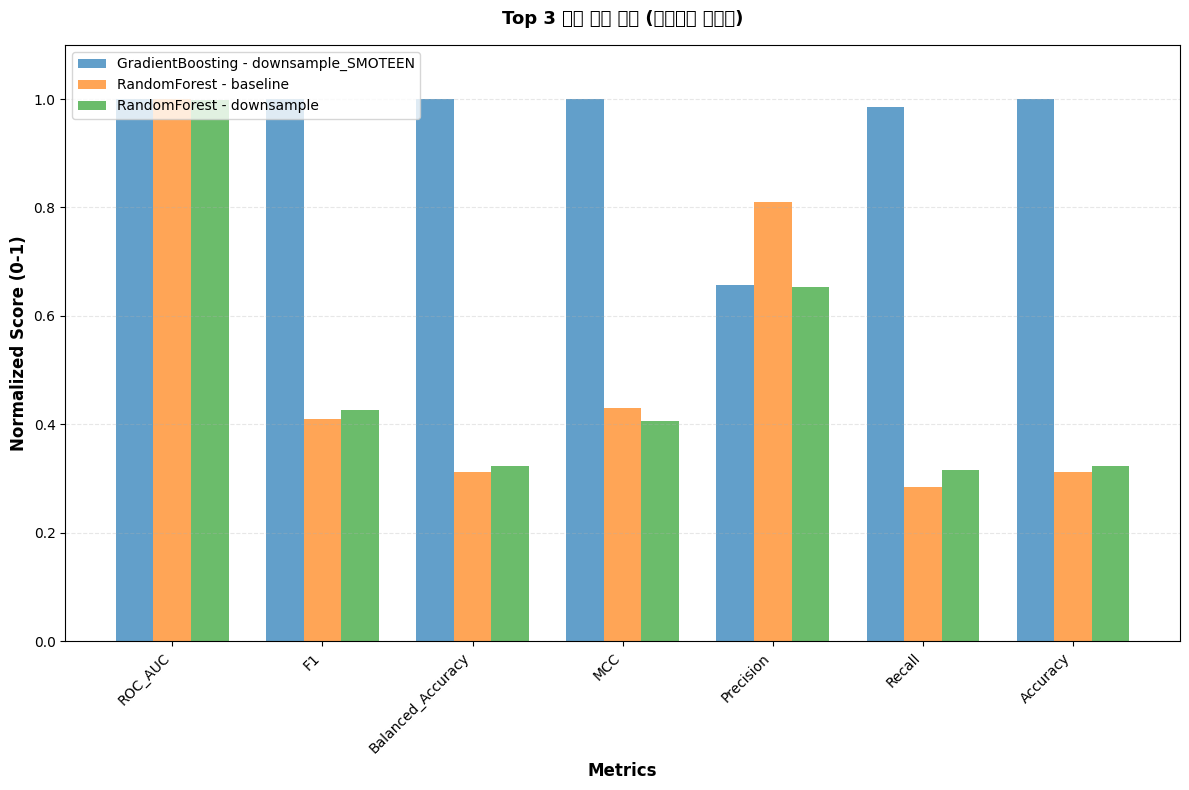


✅ 분석 완료: 총 80개 조합 중 Top 3 선정


In [3]:
# 전체 Top 3 모델-샘플링 조합 비교
from scipy.stats import t
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, matthews_corrcoef
)

def calculate_ci(values, confidence=0.95):
    """95% 신뢰구간 계산"""
    n = len(values)
    if n < 2:
        return np.nan, np.nan
    mean = np.mean(values)
    std = np.std(values, ddof=1)
    se = std / np.sqrt(n)
    t_value = t.ppf((1 + confidence) / 2, df=n-1)
    ci_lower = mean - t_value * se
    ci_upper = mean + t_value * se
    return ci_lower, ci_upper

def calculate_specificity(y_true, y_pred):
    """Specificity (True Negative Rate) 계산"""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp) if (tn + fp) > 0 else 0.0

def calculate_balanced_accuracy(y_true, y_pred):
    """Balanced Accuracy 계산"""
    recall = recall_score(y_true, y_pred)
    specificity = calculate_specificity(y_true, y_pred)
    return (recall + specificity) / 2

# 모든 모델-샘플링 조합의 메트릭 수집
all_combinations_metrics = []

for sampling_name, result in results_dict.items():
    sampling_method = result.get('sampling_method', sampling_name.replace('models_comparison_', ''))
    test_labels = result['test_labels']
    test_preds = result.get('test_preds', {})
    test_proba = result.get('test_proba', {})
    
    if not isinstance(test_preds, dict) or not isinstance(test_proba, dict):
        continue
    
    # 각 모델별로 처리
    for model_name in test_preds.keys():
        if model_name not in test_proba:
            continue
        
        preds_list = test_preds[model_name]
        proba_list = test_proba[model_name]
        
        if not isinstance(preds_list, list) or len(preds_list) == 0:
            continue
        if not isinstance(proba_list, list) or len(proba_list) == 0:
            continue
        
        # 각 fold별 메트릭 계산
        accs, precs, recalls, f1s, aucs, specs, bal_accs, mccs = [], [], [], [], [], [], [], []
        
        for fold_pred, fold_proba in zip(preds_list, proba_list):
            accs.append(accuracy_score(test_labels, fold_pred))
            precs.append(precision_score(test_labels, fold_pred, zero_division=0))
            recalls.append(recall_score(test_labels, fold_pred, zero_division=0))
            f1s.append(f1_score(test_labels, fold_pred, zero_division=0))
            aucs.append(roc_auc_score(test_labels, fold_proba))
            specs.append(calculate_specificity(test_labels, fold_pred))
            bal_accs.append(calculate_balanced_accuracy(test_labels, fold_pred))
            mccs.append(matthews_corrcoef(test_labels, fold_pred))
        
        # 평균 및 통계 계산
        def format_ci_mean_std(values, metric_name):
            mean_val = np.mean(values)
            std_val = np.std(values, ddof=1)
            ci_lower, ci_upper = calculate_ci(values)
            return {
                f"{metric_name}_mean": mean_val,
                f"{metric_name}_std": std_val,
                f"{metric_name}_ci_lower": ci_lower,
                f"{metric_name}_ci_upper": ci_upper,
            }
        
        combination_dict = {
            "Sampling_Method": sampling_method,
            "Model": model_name,
            **format_ci_mean_std(accs, "Accuracy"),
            **format_ci_mean_std(precs, "Precision"),
            **format_ci_mean_std(recalls, "Recall"),
            **format_ci_mean_std(f1s, "F1"),
            **format_ci_mean_std(aucs, "ROC_AUC"),
            **format_ci_mean_std(specs, "Specificity"),
            **format_ci_mean_std(bal_accs, "Balanced_Accuracy"),
            **format_ci_mean_std(mccs, "MCC"),
        }
        
        all_combinations_metrics.append(combination_dict)

# DataFrame 생성
df_all_combinations = pd.DataFrame(all_combinations_metrics)

if len(df_all_combinations) > 0:
    # ROC AUC 기준으로 정렬하여 Top 3 선택
    df_all_combinations = df_all_combinations.sort_values(by="ROC_AUC_mean", ascending=False)
    top3_combinations = df_all_combinations.head(3).copy()
    
    # 인덱스 설정
    top3_combinations['Combination'] = top3_combinations.apply(
        lambda row: f"{row['Model']} - {row['Sampling_Method']}", axis=1
    )
    top3_combinations = top3_combinations.set_index('Combination')
    
    print("="*80)
    print("🏆 Top 3 모델-샘플링 조합 (ROC AUC 기준)")
    print("="*80)
    
    # 요약 테이블 생성
    summary_top3 = pd.DataFrame(index=top3_combinations.index)
    for metric in ['ROC_AUC', 'F1', 'Balanced_Accuracy', 'Precision', 'Recall', 'Specificity', 'Accuracy', 'MCC']:
        summary_top3[f"{metric}"] = top3_combinations.apply(
            lambda row: f"{row[f'{metric}_mean']:.3f} [{row[f'{metric}_ci_lower']:.3f}, {row[f'{metric}_ci_upper']:.3f}]",
            axis=1
        )
        summary_top3[f"{metric}_std"] = top3_combinations[f"{metric}_std"]
    
    display(summary_top3)
    
    # 상세 통계 출력
    print("\n" + "="*80)
    print("상세 통계")
    print("="*80)
    display_cols = ['ROC_AUC_mean', 'ROC_AUC_std', 'F1_mean', 'F1_std', 
                    'Balanced_Accuracy_mean', 'Balanced_Accuracy_std',
                    'Precision_mean', 'Recall_mean', 'Accuracy_mean', 'MCC_mean']
    display(top3_combinations[display_cols])
    
    # 순위 표시
    print("\n" + "="*80)
    print("순위")
    print("="*80)
    for rank, (idx, row) in enumerate(top3_combinations.iterrows(), 1):
        print(f"\n🥇 {rank}위: {idx}")
        print(f"   ROC AUC: {row['ROC_AUC_mean']:.4f} [{row['ROC_AUC_ci_lower']:.4f}, {row['ROC_AUC_ci_upper']:.4f}]")
        print(f"   F1 Score: {row['F1_mean']:.4f} [{row['F1_ci_lower']:.4f}, {row['F1_ci_upper']:.4f}]")
        print(f"   Balanced Accuracy: {row['Balanced_Accuracy_mean']:.4f} [{row['Balanced_Accuracy_ci_lower']:.4f}, {row['Balanced_Accuracy_ci_upper']:.4f}]")
        print(f"   MCC: {row['MCC_mean']:.4f} [{row['MCC_ci_lower']:.4f}, {row['MCC_ci_upper']:.4f}]")
    
    # 시각화
    print("\n" + "="*80)
    print("시각화")
    print("="*80)
    
    # 주요 메트릭 비교 바 차트
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    metrics_to_plot = [
        ('ROC_AUC', 'ROC AUC Score'),
        ('F1', 'F1 Score'),
        ('Balanced_Accuracy', 'Balanced Accuracy'),
        ('MCC', 'Matthews Correlation Coefficient')
    ]
    
    for idx, (metric_col, metric_name) in enumerate(metrics_to_plot):
        ax = axes[idx]
        
        # 평균값과 표준편차
        means = top3_combinations[f"{metric_col}_mean"]
        stds = top3_combinations[f"{metric_col}_std"]
        
        # 바 차트
        bars = ax.barh(range(len(means)), means.values, 
                       xerr=stds.values, capsize=5, alpha=0.7)
        
        # 색상 (금, 은, 동)
        colors = ['#FFD700', '#C0C0C0', '#CD7F32']  # Gold, Silver, Bronze
        for i, bar in enumerate(bars):
            bar.set_color(colors[i])
        
        # Y축 레이블
        ax.set_yticks(range(len(means)))
        ax.set_yticklabels(means.index, fontsize=11)
        ax.invert_yaxis()  # 높은 값이 위에
        
        # X축 레이블
        ax.set_xlabel(metric_name, fontsize=12, fontweight='bold')
        ax.set_title(f'Top 3 - {metric_name} 비교', 
                    fontsize=13, fontweight='bold', pad=10)
        
        # 그리드
        ax.grid(axis='x', alpha=0.3, linestyle='--')
        
        # 값 표시
        for i, (combo_name, mean_val, std_val) in enumerate(zip(means.index, means.values, stds.values)):
            ax.text(mean_val + std_val + 0.005, i, f'{mean_val:.3f}', 
                   va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # 종합 비교 레이더 차트 스타일 (여러 메트릭 동시 비교)
    print("\n종합 메트릭 비교:")
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # 메트릭 정규화 (0-1 스케일)
    metrics_for_radar = ['ROC_AUC', 'F1', 'Balanced_Accuracy', 'MCC', 'Precision', 'Recall', 'Accuracy']
    normalized_data = {}
    
    for combo_name in top3_combinations.index:
        normalized_values = []
        for metric in metrics_for_radar:
            # 전체 데이터에서 최대값과 최소값으로 정규화
            max_val = df_all_combinations[f"{metric}_mean"].max()
            min_val = df_all_combinations[f"{metric}_mean"].min()
            if max_val > min_val:
                normalized = (top3_combinations.loc[combo_name, f"{metric}_mean"] - min_val) / (max_val - min_val)
            else:
                normalized = 1.0
            normalized_values.append(normalized)
        normalized_data[combo_name] = normalized_values
    
    # 바 차트로 표시
    x = np.arange(len(metrics_for_radar))
    width = 0.25
    
    for i, (combo_name, values) in enumerate(normalized_data.items()):
        offset = (i - 1) * width
        ax.bar(x + offset, values, width, label=combo_name, alpha=0.7)
    
    ax.set_xlabel('Metrics', fontsize=12, fontweight='bold')
    ax.set_ylabel('Normalized Score (0-1)', fontsize=12, fontweight='bold')
    ax.set_title('Top 3 조합 종합 비교 (정규화된 메트릭)', fontsize=13, fontweight='bold', pad=15)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_for_radar, rotation=45, ha='right')
    ax.legend(loc='upper left', fontsize=10)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_ylim([0, 1.1])
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n✅ 분석 완료: 총 {len(df_all_combinations)}개 조합 중 Top 3 선정")
else:
    print("⚠️  비교할 조합 데이터가 없습니다.")


## 모델별 비교 (모든 샘플링 방법 평균)

In [4]:
# 모델별 비교: 각 모델에 대해 모든 샘플링 방법의 결과를 평균내어 비교
from scipy.stats import t
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, matthews_corrcoef
)

def calculate_ci(values, confidence=0.95):
    """95% 신뢰구간 계산"""
    n = len(values)
    if n < 2:
        return np.nan, np.nan
    mean = np.mean(values)
    std = np.std(values, ddof=1)
    se = std / np.sqrt(n)
    t_value = t.ppf((1 + confidence) / 2, df=n-1)
    ci_lower = mean - t_value * se
    ci_upper = mean + t_value * se
    return ci_lower, ci_upper

def calculate_specificity(y_true, y_pred):
    """Specificity (True Negative Rate) 계산"""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp) if (tn + fp) > 0 else 0.0

def calculate_balanced_accuracy(y_true, y_pred):
    """Balanced Accuracy 계산"""
    recall = recall_score(y_true, y_pred)
    specificity = calculate_specificity(y_true, y_pred)
    return (recall + specificity) / 2

# 모델별로 메트릭 수집 (모든 샘플링 방법에서)
model_metrics = {}  # {model_name: {metric_name: [values across sampling methods]}}

for sampling_name, result in results_dict.items():
    sampling_method = result.get('sampling_method', sampling_name.replace('models_comparison_', ''))
    test_labels = result['test_labels']
    test_preds = result.get('test_preds', {})
    test_proba = result.get('test_proba', {})
    
    if not isinstance(test_preds, dict) or not isinstance(test_proba, dict):
        continue
    
    # 각 모델별로 처리
    for model_name in test_preds.keys():
        if model_name not in test_proba:
            continue
        
        preds_list = test_preds[model_name]
        proba_list = test_proba[model_name]
        
        if not isinstance(preds_list, list) or len(preds_list) == 0:
            continue
        if not isinstance(proba_list, list) or len(proba_list) == 0:
            continue
        
        # 모델별 딕셔너리 초기화
        if model_name not in model_metrics:
            model_metrics[model_name] = {
                'accs': [], 'precs': [], 'recalls': [], 'f1s': [],
                'aucs': [], 'specs': [], 'bal_accs': [], 'mccs': []
            }
        
        # 각 fold별 메트릭 계산
        for fold_pred, fold_proba in zip(preds_list, proba_list):
            model_metrics[model_name]['accs'].append(accuracy_score(test_labels, fold_pred))
            model_metrics[model_name]['precs'].append(precision_score(test_labels, fold_pred, zero_division=0))
            model_metrics[model_name]['recalls'].append(recall_score(test_labels, fold_pred, zero_division=0))
            model_metrics[model_name]['f1s'].append(f1_score(test_labels, fold_pred, zero_division=0))
            model_metrics[model_name]['aucs'].append(roc_auc_score(test_labels, fold_proba))
            model_metrics[model_name]['specs'].append(calculate_specificity(test_labels, fold_pred))
            model_metrics[model_name]['bal_accs'].append(calculate_balanced_accuracy(test_labels, fold_pred))
            model_metrics[model_name]['mccs'].append(matthews_corrcoef(test_labels, fold_pred))

# 모델별 평균 및 통계 계산
model_summary_list = []

for model_name, metrics in model_metrics.items():
    # 각 메트릭에 대해 평균, std, CI 계산
    def format_ci_mean_std(values, metric_name):
        mean_val = np.mean(values)
        std_val = np.std(values, ddof=1)
        ci_lower, ci_upper = calculate_ci(values)
        return {
            f"{metric_name}_mean": mean_val,
            f"{metric_name}_std": std_val,
            f"{metric_name}_ci_lower": ci_lower,
            f"{metric_name}_ci_upper": ci_upper,
            f"{metric_name}_count": len(values)  # 샘플링 방법 × fold 수
        }
    
    summary_dict = {
        "Model": model_name,
        **format_ci_mean_std(metrics['accs'], "Accuracy"),
        **format_ci_mean_std(metrics['precs'], "Precision"),
        **format_ci_mean_std(metrics['recalls'], "Recall"),
        **format_ci_mean_std(metrics['f1s'], "F1"),
        **format_ci_mean_std(metrics['aucs'], "ROC_AUC"),
        **format_ci_mean_std(metrics['specs'], "Specificity"),
        **format_ci_mean_std(metrics['bal_accs'], "Balanced_Accuracy"),
        **format_ci_mean_std(metrics['mccs'], "MCC"),
    }
    
    model_summary_list.append(summary_dict)

# DataFrame 생성
df_model_comparison = pd.DataFrame(model_summary_list)
df_model_comparison = df_model_comparison.set_index('Model')

# ROC AUC 기준으로 정렬
df_model_comparison = df_model_comparison.sort_values(by="ROC_AUC_mean", ascending=False)

# 요약 DataFrame 생성 (95% CI 포함)
summary_df = pd.DataFrame(index=df_model_comparison.index)
for metric in ['ROC_AUC', 'F1', 'Balanced_Accuracy', 'Precision', 'Recall', 'Specificity', 'Accuracy', 'MCC']:
    summary_df[f"{metric}"] = df_model_comparison.apply(
        lambda row: f"{row[f'{metric}_mean']:.3f} [{row[f'{metric}_ci_lower']:.3f}, {row[f'{metric}_ci_upper']:.3f}]",
        axis=1
    )
    summary_df[f"{metric}_std"] = df_model_comparison[f"{metric}_std"]

print("="*80)
print("모델별 비교 결과 (모든 샘플링 방법 평균)")
print("="*80)
print(f"\n각 메트릭은 모든 샘플링 방법과 모든 fold에서 계산된 값의 평균입니다.")
print(f"형식: 평균 [95% CI 하한, 95% CI 상한]\n")
display(summary_df)

# 상세 통계 출력
print("\n" + "="*80)
print("상세 통계")
print("="*80)
display_cols = ['ROC_AUC_mean', 'ROC_AUC_std', 'F1_mean', 'F1_std', 
                'Balanced_Accuracy_mean', 'Balanced_Accuracy_std',
                'Precision_mean', 'Recall_mean', 'Accuracy_mean', 'MCC_mean']
display(df_model_comparison[display_cols])

# 최고 성능 모델 표시
print("\n" + "="*80)
print("🏆 최고 성능 모델 (각 메트릭별)")
print("="*80)
for metric in ['ROC_AUC', 'F1', 'Balanced_Accuracy', 'Precision', 'Recall', 'Accuracy', 'MCC']:
    best_model = df_model_comparison[f"{metric}_mean"].idxmax()
    best_value = df_model_comparison.loc[best_model, f"{metric}_mean"]
    best_ci_lower = df_model_comparison.loc[best_model, f"{metric}_ci_lower"]
    best_ci_upper = df_model_comparison.loc[best_model, f"{metric}_ci_upper"]
    print(f"{metric:20s}: {best_model:25s} = {best_value:.4f} [{best_ci_lower:.4f}, {best_ci_upper:.4f}]")

모델별 비교 결과 (모든 샘플링 방법 평균)

각 메트릭은 모든 샘플링 방법과 모든 fold에서 계산된 값의 평균입니다.
형식: 평균 [95% CI 하한, 95% CI 상한]



,ROC_AUC,ROC_AUC_std,F1,F1_std,Balanced_Accuracy,Balanced_Accuracy_std,Precision,Precision_std,Recall,Recall_std,Specificity,Specificity_std,Accuracy,Accuracy_std,MCC,MCC_std
Model,,,,,,,,,,,,,,,,
RandomForest,"0.913 [0.910, 0.915]",0.008756,"0.502 [0.467, 0.537]",0.123070,"0.659 [0.644, 0.674]",0.052829,"0.903 [0.890, 0.916]",0.045584,"0.359 [0.326, 0.392]",0.117041,"0.960 [0.954, 0.966]",0.021320,"0.659 [0.644, 0.674]",0.052829,"0.398 [0.373, 0.422]",0.086727
LightGBM,"0.901 [0.897, 0.904]",0.013006,"0.645 [0.607, 0.684]",0.135084,"0.727 [0.708, 0.746]",0.066444,"0.878 [0.868, 0.889]",0.037047,"0.530 [0.486, 0.575]",0.157096,"0.924 [0.914, 0.933]",0.032662,"0.727 [0.708, 0.746]",0.066444,"0.496 [0.466, 0.526]",0.105469
CatBoost,"0.897 [0.892, 0.901]",0.015452,"0.500 [0.464, 0.536]",0.127959,"0.657 [0.642, 0.672]",0.052300,"0.889 [0.875, 0.904]",0.051330,"0.361 [0.326, 0.396]",0.122410,"0.952 [0.944, 0.961]",0.029163,"0.657 [0.642, 0.672]",0.052300,"0.388 [0.364, 0.413]",0.085959
GradientBoosting,"0.894 [0.888, 0.900]",0.021514,"0.612 [0.563, 0.662]",0.174625,"0.711 [0.690, 0.733]",0.075628,"0.871 [0.857, 0.885]",0.048775,"0.504 [0.451, 0.558]",0.188616,"0.919 [0.904, 0.933]",0.051468,"0.711 [0.690, 0.733]",0.075628,"0.468 [0.433, 0.503]",0.122402
XGBoost,"0.887 [0.874, 0.900]",0.046082,"0.580 [0.508, 0.652]",0.253110,"0.708 [0.679, 0.736]",0.099762,"0.852 [0.799, 0.905]",0.187262,"0.486 [0.418, 0.554]",0.239827,"0.929 [0.916, 0.942]",0.045496,"0.708 [0.679, 0.736]",0.099762,"0.457 [0.406, 0.507]",0.178041
LogisticRegression,"0.882 [0.876, 0.888]",0.020329,"0.386 [0.348, 0.424]",0.132678,"0.611 [0.597, 0.626]",0.050138,"0.886 [0.873, 0.900]",0.047620,"0.259 [0.225, 0.292]",0.117670,"0.964 [0.959, 0.970]",0.020206,"0.611 [0.597, 0.626]",0.050138,"0.312 [0.289, 0.336]",0.082168
MLP,"0.871 [0.843, 0.900]",0.100677,"0.268 [0.241, 0.296]",0.095676,"0.570 [0.562, 0.577]",0.027446,"0.925 [0.893, 0.956]",0.111628,"0.171 [0.134, 0.208]",0.130521,"0.969 [0.929, 1.009]",0.140563,"0.570 [0.562, 0.577]",0.027446,"0.251 [0.229, 0.272]",0.075344
SVM,"0.847 [0.827, 0.867]",0.070846,"0.376 [0.346, 0.407]",0.107349,"0.609 [0.599, 0.619]",0.036841,"0.916 [0.899, 0.934]",0.060434,"0.245 [0.219, 0.271]",0.090867,"0.973 [0.967, 0.979]",0.022052,"0.609 [0.599, 0.619]",0.036841,"0.319 [0.302, 0.335]",0.057541



상세 통계


,ROC_AUC_mean,ROC_AUC_std,F1_mean,F1_std,Balanced_Accuracy_mean,Balanced_Accuracy_std,Precision_mean,Recall_mean,Accuracy_mean,MCC_mean
Model,,,,,,,,,,
RandomForest,0.912872,0.008756,0.502004,0.123070,0.659333,0.052829,0.902800,0.359000,0.659333,0.397588
LightGBM,0.900750,0.013006,0.645374,0.135084,0.727000,0.066444,0.878154,0.530333,0.727000,0.496427
CatBoost,0.896561,0.015452,0.500107,0.127959,0.656667,0.052300,0.889167,0.361000,0.656667,0.388263
GradientBoosting,0.893911,0.021514,0.612389,0.174625,0.711500,0.075628,0.870760,0.504333,0.711500,0.468232
XGBoost,0.887144,0.046082,0.580327,0.253110,0.707500,0.099762,0.851891,0.485667,0.707500,0.456766
LogisticRegression,0.881833,0.020329,0.386174,0.132678,0.611500,0.050138,0.886067,0.258667,0.611500,0.312292
MLP,0.871489,0.100677,0.268456,0.095676,0.569667,0.027446,0.924764,0.170667,0.569667,0.250764
SVM,0.846900,0.070846,0.376282,0.107349,0.609000,0.036841,0.916329,0.245000,0.609000,0.318763



🏆 최고 성능 모델 (각 메트릭별)
ROC_AUC             : RandomForest              = 0.9129 [0.9104, 0.9154]
F1                  : LightGBM                  = 0.6454 [0.6070, 0.6838]
Balanced_Accuracy   : LightGBM                  = 0.7270 [0.7081, 0.7459]
Precision           : MLP                       = 0.9248 [0.8930, 0.9565]
Recall              : LightGBM                  = 0.5303 [0.4857, 0.5750]
Accuracy            : LightGBM                  = 0.7270 [0.7081, 0.7459]
MCC                 : LightGBM                  = 0.4964 [0.4665, 0.5264]


/tmp/ipykernel_238627/3014628148.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(boxplot_data, labels=model_labels, vert=True,
/tmp/ipykernel_238627/3014628148.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(boxplot_data, labels=model_labels, vert=True,
/tmp/ipykernel_238627/3014628148.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(boxplot_data, labels=model_labels, vert=True,
/tmp/ipykernel_238627/3014628148.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old na

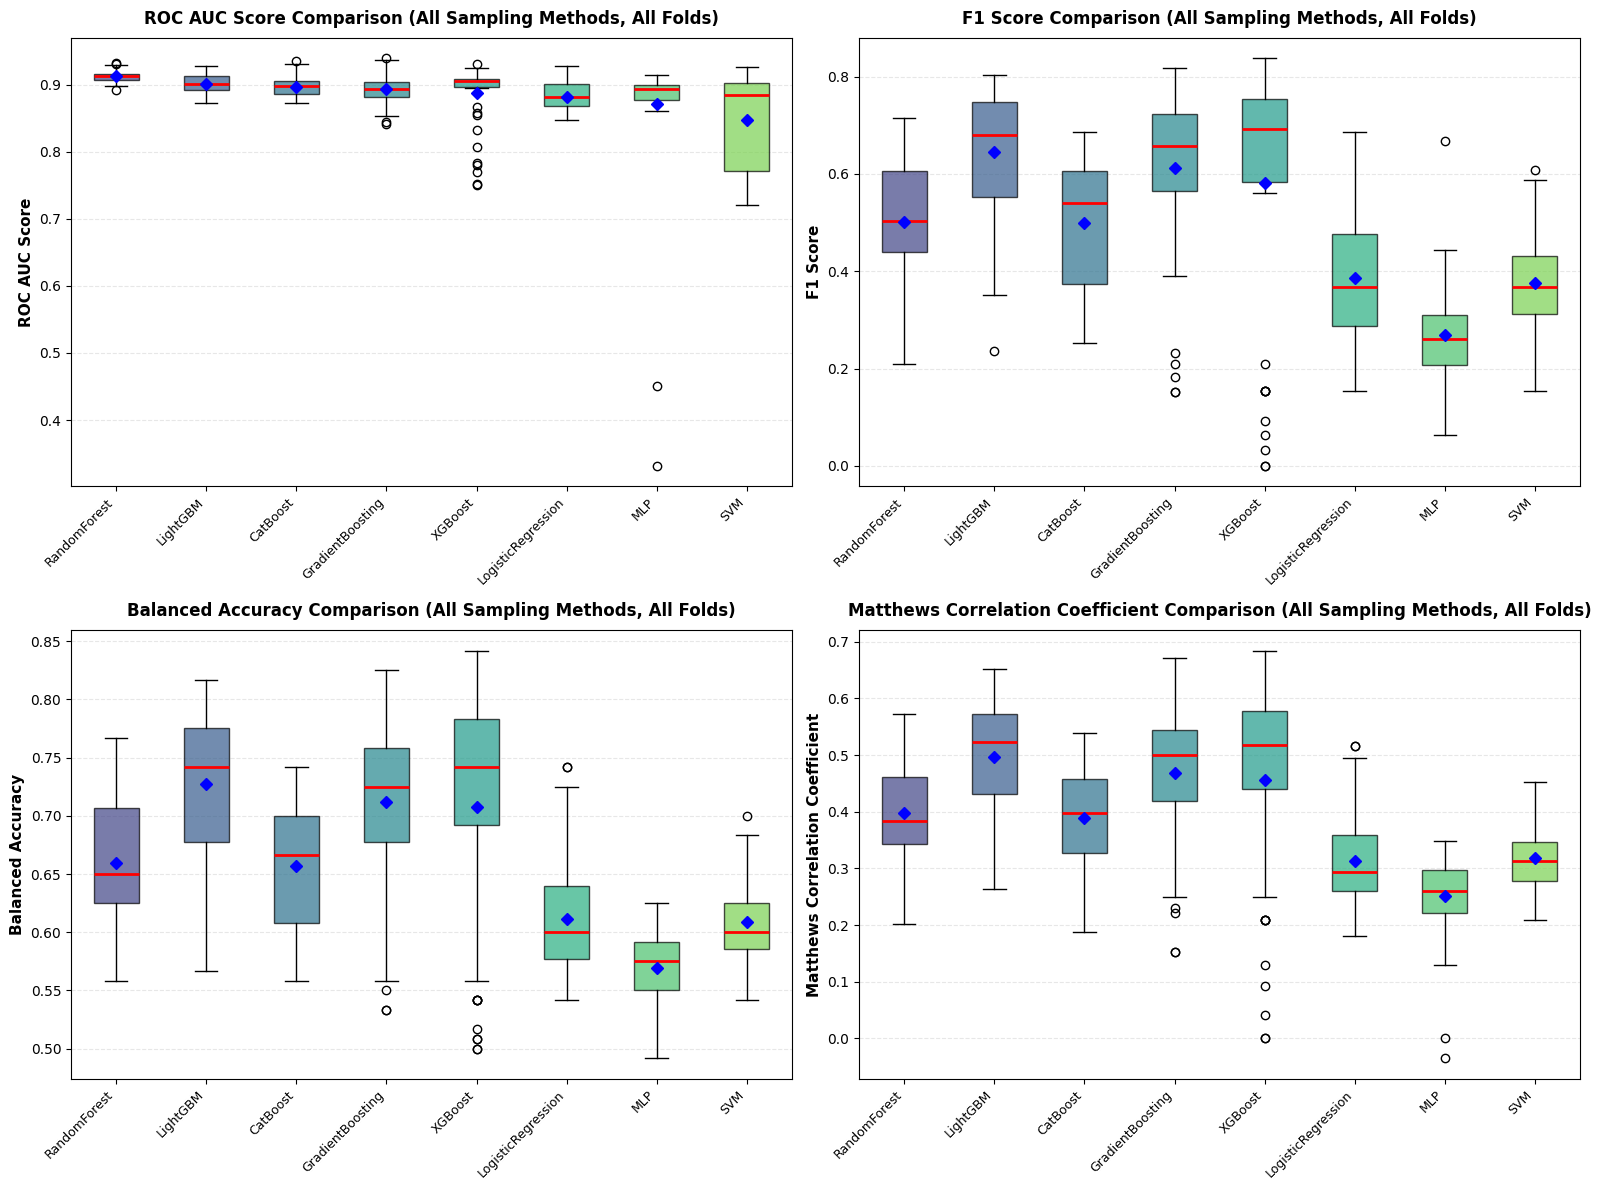


📊 Boxplot 설명:
  - 상자(Box): Q1(25%), 중앙값(50%), Q3(75%)
  - 수염(Whisker): 1.5 IQR 범위
  - 빨간 선: 중앙값
  - 파란 다이아몬드: 평균값
  - 점: 이상치(Outliers)


In [12]:
# Visualization of Model Performance Comparison using boxplot
if len(df_model_comparison) > 0 and 'model_metrics' in locals():
    # Visualize key metrics using boxplot
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    metrics_to_plot = [
        ('aucs', 'ROC_AUC', 'ROC AUC Score'),
        ('f1s', 'F1', 'F1 Score'),
        ('bal_accs', 'Balanced_Accuracy', 'Balanced Accuracy'),
        ('mccs', 'MCC', 'Matthews Correlation Coefficient')
    ]
    
    for idx, (metric_key, metric_col, metric_name) in enumerate(metrics_to_plot):
        ax = axes[idx]
        
        # 각 모델별로 메트릭 값 수집
        boxplot_data = []
        model_labels = []
        
        # ROC AUC 기준으로 정렬된 순서대로 처리
        sorted_models = df_model_comparison.sort_values(by="ROC_AUC_mean", ascending=False).index
        
        for model_name in sorted_models:
            if model_name in model_metrics and metric_key in model_metrics[model_name]:
                values = model_metrics[model_name][metric_key]
                if len(values) > 0:
                    boxplot_data.append(values)
                    model_labels.append(model_name)
        
        if len(boxplot_data) == 0:
            ax.text(0.5, 0.5, 'No data available', 
                   ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title(f'{metric_name} Comparison', fontsize=12, fontweight='bold', pad=10)
            continue
        
        # Boxplot 생성
        bp = ax.boxplot(boxplot_data, labels=model_labels, vert=True, 
                       patch_artist=True, showmeans=True, meanline=False,
                       showfliers=True, whis=1.5)
        
        # 색상 설정 (성능 순서대로 그라데이션)
        colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(bp['boxes'])))
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        # 중앙값, 평균선 스타일 설정
        for median in bp['medians']:
            median.set_color('red')
            median.set_linewidth(2)
        
        for mean in bp['means']:
            mean.set_marker('D')
            mean.set_markerfacecolor('blue')
            mean.set_markeredgecolor('blue')
            mean.set_markersize(6)
        
        # X축 레이블 회전
        ax.set_xticklabels(model_labels, rotation=45, ha='right', fontsize=9)
        
        # Y축 레이블
        ax.set_ylabel(metric_name, fontsize=11, fontweight='bold')
        ax.set_title(f'{metric_name} Comparison (All Sampling Methods, All Folds)', 
                    fontsize=12, fontweight='bold', pad=10)
        
        # 그리드
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        
        # 평균값 표시 (수치 안 보이게 주석 처리)
        # for i, (model_name, values) in enumerate(zip(model_labels, boxplot_data)):
        #     mean_val = np.mean(values)
        #     ax.text(i + 1, mean_val, f'{mean_val:.3f}', 
        #            ha='center', va='bottom', fontsize=8, fontweight='bold',
        #            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Boxplot 설명:")
    print("  - 상자(Box): Q1(25%), 중앙값(50%), Q3(75%)")
    print("  - 수염(Whisker): 1.5 IQR 범위")
    print("  - 빨간 선: 중앙값")
    print("  - 파란 다이아몬드: 평균값")
    print("  - 점: 이상치(Outliers)")
    
else:
    print("⚠️  No model data available for comparison.")
    print("   (model_metrics 변수가 필요합니다. 모델별 비교 셀을 먼저 실행해주세요.)")


## Sampling 별 비교

In [13]:
# 샘플링 방법별 비교: 각 샘플링 방법에 대해 모든 모델의 결과를 평균내어 비교
from scipy.stats import t
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, matthews_corrcoef
)

def calculate_ci(values, confidence=0.95):
    """95% 신뢰구간 계산"""
    n = len(values)
    if n < 2:
        return np.nan, np.nan
    mean = np.mean(values)
    std = np.std(values, ddof=1)
    se = std / np.sqrt(n)
    t_value = t.ppf((1 + confidence) / 2, df=n-1)
    ci_lower = mean - t_value * se
    ci_upper = mean + t_value * se
    return ci_lower, ci_upper

def calculate_specificity(y_true, y_pred):
    """Specificity (True Negative Rate) 계산"""
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp) if (tn + fp) > 0 else 0.0

def calculate_balanced_accuracy(y_true, y_pred):
    """Balanced Accuracy 계산"""
    recall = recall_score(y_true, y_pred)
    specificity = calculate_specificity(y_true, y_pred)
    return (recall + specificity) / 2

# 샘플링 방법별로 메트릭 수집 (모든 모델에서)
sampling_metrics = {}  # {sampling_method: {metric_name: [values across models]}}

for sampling_name, result in results_dict.items():
    sampling_method = result.get('sampling_method', sampling_name.replace('models_comparison_', ''))
    test_labels = result['test_labels']
    test_preds = result.get('test_preds', {})
    test_proba = result.get('test_proba', {})
    
    if not isinstance(test_preds, dict) or not isinstance(test_proba, dict):
        continue
    
    # 샘플링 방법별 딕셔너리 초기화
    if sampling_method not in sampling_metrics:
        sampling_metrics[sampling_method] = {
            'accs': [], 'precs': [], 'recalls': [], 'f1s': [],
            'aucs': [], 'specs': [], 'bal_accs': [], 'mccs': []
        }
    
    # 각 모델별로 처리
    for model_name in test_preds.keys():
        if model_name not in test_proba:
            continue
        
        preds_list = test_preds[model_name]
        proba_list = test_proba[model_name]
        
        if not isinstance(preds_list, list) or len(preds_list) == 0:
            continue
        if not isinstance(proba_list, list) or len(proba_list) == 0:
            continue
        
        # 각 fold별 메트릭 계산
        for fold_pred, fold_proba in zip(preds_list, proba_list):
            sampling_metrics[sampling_method]['accs'].append(accuracy_score(test_labels, fold_pred))
            sampling_metrics[sampling_method]['precs'].append(precision_score(test_labels, fold_pred, zero_division=0))
            sampling_metrics[sampling_method]['recalls'].append(recall_score(test_labels, fold_pred, zero_division=0))
            sampling_metrics[sampling_method]['f1s'].append(f1_score(test_labels, fold_pred, zero_division=0))
            sampling_metrics[sampling_method]['aucs'].append(roc_auc_score(test_labels, fold_proba))
            sampling_metrics[sampling_method]['specs'].append(calculate_specificity(test_labels, fold_pred))
            sampling_metrics[sampling_method]['bal_accs'].append(calculate_balanced_accuracy(test_labels, fold_pred))
            sampling_metrics[sampling_method]['mccs'].append(matthews_corrcoef(test_labels, fold_pred))

# 샘플링 방법별 평균 및 통계 계산
sampling_summary_list = []

for sampling_method, metrics in sampling_metrics.items():
    # 각 메트릭에 대해 평균, std, CI 계산 (소수점 3자리로 제한)
    def format_ci_mean_std(values, metric_name):
        mean_val = np.mean(values)
        std_val = np.std(values, ddof=1)
        ci_lower, ci_upper = calculate_ci(values)
        # 소수점 3자리로 반올림, numpy.float이 나올 수 있으니 float 변환
        return {
            f"{metric_name}_mean": float(f"{mean_val:.3f}"),
            f"{metric_name}_std": float(f"{std_val:.3f}"),
            f"{metric_name}_ci_lower": float(f"{ci_lower:.3f}"),
            f"{metric_name}_ci_upper": float(f"{ci_upper:.3f}"),
            f"{metric_name}_count": int(len(values))  # 모델 × fold 수
        }
    
    summary_dict = {
        "Sampling_Method": sampling_method,
        **format_ci_mean_std(metrics['accs'], "Accuracy"),
        **format_ci_mean_std(metrics['precs'], "Precision"),
        **format_ci_mean_std(metrics['recalls'], "Recall"),
        **format_ci_mean_std(metrics['f1s'], "F1"),
        **format_ci_mean_std(metrics['aucs'], "ROC_AUC"),
        **format_ci_mean_std(metrics['specs'], "Specificity"),
        **format_ci_mean_std(metrics['bal_accs'], "Balanced_Accuracy"),
        **format_ci_mean_std(metrics['mccs'], "MCC"),
    }
    
    sampling_summary_list.append(summary_dict)

# DataFrame 생성
df_sampling_comparison = pd.DataFrame(sampling_summary_list)
df_sampling_comparison = df_sampling_comparison.set_index('Sampling_Method')

# ROC AUC 기준으로 정렬
df_sampling_comparison = df_sampling_comparison.sort_values(by="ROC_AUC_mean", ascending=False)

# 요약 DataFrame 생성 (95% CI 포함)
summary_df_sampling = pd.DataFrame(index=df_sampling_comparison.index)
for metric in ['ROC_AUC', 'F1', 'Balanced_Accuracy', 'Precision', 'Recall', 'Specificity', 'Accuracy', 'MCC']:
    summary_df_sampling[f"{metric}"] = df_sampling_comparison.apply(
        lambda row: f"{row[f'{metric}_mean']:.3f} [{row[f'{metric}_ci_lower']:.3f}, {row[f'{metric}_ci_upper']:.3f}]",
        axis=1
    )
    summary_df_sampling[f"{metric}_std"] = df_sampling_comparison[f"{metric}_std"]

print("="*80)
print("샘플링 방법별 비교 결과 (모든 모델 평균)")
print("="*80)
print(f"\n각 메트릭은 모든 모델과 모든 fold에서 계산된 값의 평균입니다.")
print(f"형식: 평균 [95% CI 하한, 95% CI 상한]\n")
display(summary_df_sampling)

# 상세 통계 출력 (소수점 3자리로 맞추기)
print("\n" + "="*80)
print("상세 통계")
print("="*80)
display_cols = ['ROC_AUC_mean', 'ROC_AUC_std', 'F1_mean', 'F1_std', 
                'Balanced_Accuracy_mean', 'Balanced_Accuracy_std',
                'Precision_mean', 'Recall_mean', 'Accuracy_mean', 'MCC_mean']
# 전체 DataFrame을 소수점 3자리로 포맷하여 출력
display(df_sampling_comparison[display_cols].applymap(lambda x: f"{x:.3f}"))

# 최고 성능 샘플링 방법 표시 (소수점 3자리까지)
print("\n" + "="*80)
print("🏆 최고 성능 샘플링 방법 (각 메트릭별)")
print("="*80)
for metric in ['ROC_AUC', 'F1', 'Balanced_Accuracy', 'Precision', 'Recall', 'Accuracy', 'MCC']:
    best_sampling = df_sampling_comparison[f"{metric}_mean"].idxmax()
    best_value = df_sampling_comparison.loc[best_sampling, f"{metric}_mean"]
    best_ci_lower = df_sampling_comparison.loc[best_sampling, f"{metric}_ci_lower"]
    best_ci_upper = df_sampling_comparison.loc[best_sampling, f"{metric}_ci_upper"]
    print(f"{metric:20s}: {best_sampling:25s} = {best_value:.3f} [{best_ci_lower:.3f}, {best_ci_upper:.3f}]")


샘플링 방법별 비교 결과 (모든 모델 평균)

각 메트릭은 모든 모델과 모든 fold에서 계산된 값의 평균입니다.
형식: 평균 [95% CI 하한, 95% CI 상한]



,ROC_AUC,ROC_AUC_std,F1,F1_std,Balanced_Accuracy,Balanced_Accuracy_std,Precision,Precision_std,Recall,Recall_std,Specificity,Specificity_std,Accuracy,Accuracy_std,MCC,MCC_std
Sampling_Method,,,,,,,,,,,,,,,,
downsample_SMOTEEN,"0.911 [0.906, 0.915]",0.014,"0.603 [0.542, 0.663]",0.189,"0.714 [0.687, 0.741]",0.085,"0.903 [0.890, 0.915]",0.039,"0.483 [0.421, 0.545]",0.194,"0.945 [0.934, 0.956]",0.033,"0.714 [0.687, 0.741]",0.085,"0.482 [0.437, 0.527]",0.140
downsample_SMOTETomek,"0.903 [0.898, 0.909]",0.017,"0.487 [0.437, 0.537]",0.156,"0.654 [0.634, 0.674]",0.063,"0.898 [0.883, 0.912]",0.046,"0.351 [0.306, 0.397]",0.143,"0.957 [0.950, 0.965]",0.024,"0.654 [0.634, 0.674]",0.063,"0.386 [0.353, 0.419]",0.103
downsample_SMOTE,"0.902 [0.897, 0.908]",0.018,"0.487 [0.439, 0.535]",0.151,"0.654 [0.634, 0.674]",0.062,"0.893 [0.880, 0.907]",0.042,"0.351 [0.306, 0.396]",0.140,"0.957 [0.949, 0.964]",0.024,"0.654 [0.634, 0.674]",0.062,"0.384 [0.351, 0.417]",0.103
downsample_ADASYN,"0.900 [0.895, 0.905]",0.016,"0.506 [0.455, 0.557]",0.159,"0.663 [0.641, 0.684]",0.067,"0.893 [0.881, 0.905]",0.038,"0.372 [0.323, 0.421]",0.153,"0.953 [0.945, 0.961]",0.025,"0.663 [0.641, 0.684]",0.067,"0.398 [0.363, 0.432]",0.109
oversample_SMOTEEN,"0.894 [0.886, 0.902]",0.024,"0.540 [0.493, 0.587]",0.147,"0.677 [0.656, 0.698]",0.065,"0.890 [0.876, 0.904]",0.043,"0.407 [0.358, 0.456]",0.154,"0.946 [0.937, 0.956]",0.030,"0.677 [0.656, 0.698]",0.065,"0.420 [0.388, 0.453]",0.102
downsample,"0.881 [0.852, 0.911]",0.093,"0.352 [0.304, 0.400]",0.151,"0.601 [0.584, 0.618]",0.053,"0.865 [0.811, 0.919]",0.168,"0.232 [0.194, 0.269]",0.118,"0.970 [0.963, 0.977]",0.020,"0.601 [0.584, 0.618]",0.053,"0.291 [0.256, 0.325]",0.109
oversample_SMOTE,"0.871 [0.855, 0.887]",0.051,"0.528 [0.463, 0.593]",0.204,"0.676 [0.648, 0.704]",0.088,"0.887 [0.867, 0.907]",0.063,"0.419 [0.347, 0.490]",0.224,"0.934 [0.917, 0.950]",0.052,"0.676 [0.648, 0.704]",0.088,"0.417 [0.375, 0.459]",0.131
oversample_SMOTETomek,"0.871 [0.855, 0.887]",0.051,"0.528 [0.463, 0.593]",0.204,"0.676 [0.648, 0.704]",0.088,"0.887 [0.867, 0.907]",0.063,"0.419 [0.347, 0.490]",0.224,"0.934 [0.917, 0.950]",0.052,"0.676 [0.648, 0.704]",0.088,"0.417 [0.375, 0.459]",0.131
oversample_ADASYN,"0.870 [0.855, 0.885]",0.048,"0.534 [0.469, 0.600]",0.205,"0.678 [0.651, 0.706]",0.087,"0.886 [0.863, 0.908]",0.070,"0.428 [0.356, 0.499]",0.225,"0.929 [0.911, 0.948]",0.057,"0.678 [0.651, 0.706]",0.087,"0.420 [0.378, 0.461]",0.130



상세 통계


/tmp/ipykernel_238627/3682410050.py:138: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(df_sampling_comparison[display_cols].applymap(lambda x: f"{x:.3f}"))


,ROC_AUC_mean,ROC_AUC_std,F1_mean,F1_std,Balanced_Accuracy_mean,Balanced_Accuracy_std,Precision_mean,Recall_mean,Accuracy_mean,MCC_mean
Sampling_Method,,,,,,,,,,
downsample_SMOTEEN,0.911,0.014,0.603,0.189,0.714,0.085,0.903,0.483,0.714,0.482
downsample_SMOTETomek,0.903,0.017,0.487,0.156,0.654,0.063,0.898,0.351,0.654,0.386
downsample_SMOTE,0.902,0.018,0.487,0.151,0.654,0.062,0.893,0.351,0.654,0.384
downsample_ADASYN,0.900,0.016,0.506,0.159,0.663,0.067,0.893,0.372,0.663,0.398
oversample_SMOTEEN,0.894,0.024,0.540,0.147,0.677,0.065,0.890,0.407,0.677,0.420
downsample,0.881,0.093,0.352,0.151,0.601,0.053,0.865,0.232,0.601,0.291
oversample_SMOTE,0.871,0.051,0.528,0.204,0.676,0.088,0.887,0.419,0.676,0.417
oversample_SMOTETomek,0.871,0.051,0.528,0.204,0.676,0.088,0.887,0.419,0.676,0.417
oversample_ADASYN,0.870,0.048,0.534,0.205,0.678,0.087,0.886,0.428,0.678,0.420



🏆 최고 성능 샘플링 방법 (각 메트릭별)
ROC_AUC             : downsample_SMOTEEN        = 0.911 [0.906, 0.915]
F1                  : downsample_SMOTEEN        = 0.603 [0.542, 0.663]
Balanced_Accuracy   : downsample_SMOTEEN        = 0.714 [0.687, 0.741]
Precision           : downsample_SMOTEEN        = 0.903 [0.890, 0.915]
Recall              : downsample_SMOTEEN        = 0.483 [0.421, 0.545]
Accuracy            : downsample_SMOTEEN        = 0.714 [0.687, 0.741]
MCC                 : downsample_SMOTEEN        = 0.482 [0.437, 0.527]


/tmp/ipykernel_238627/1018532240.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(boxplot_data, labels=sampling_labels, vert=True,
/tmp/ipykernel_238627/1018532240.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(boxplot_data, labels=sampling_labels, vert=True,
/tmp/ipykernel_238627/1018532240.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(boxplot_data, labels=sampling_labels, vert=True,
/tmp/ipykernel_238627/1018532240.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for t

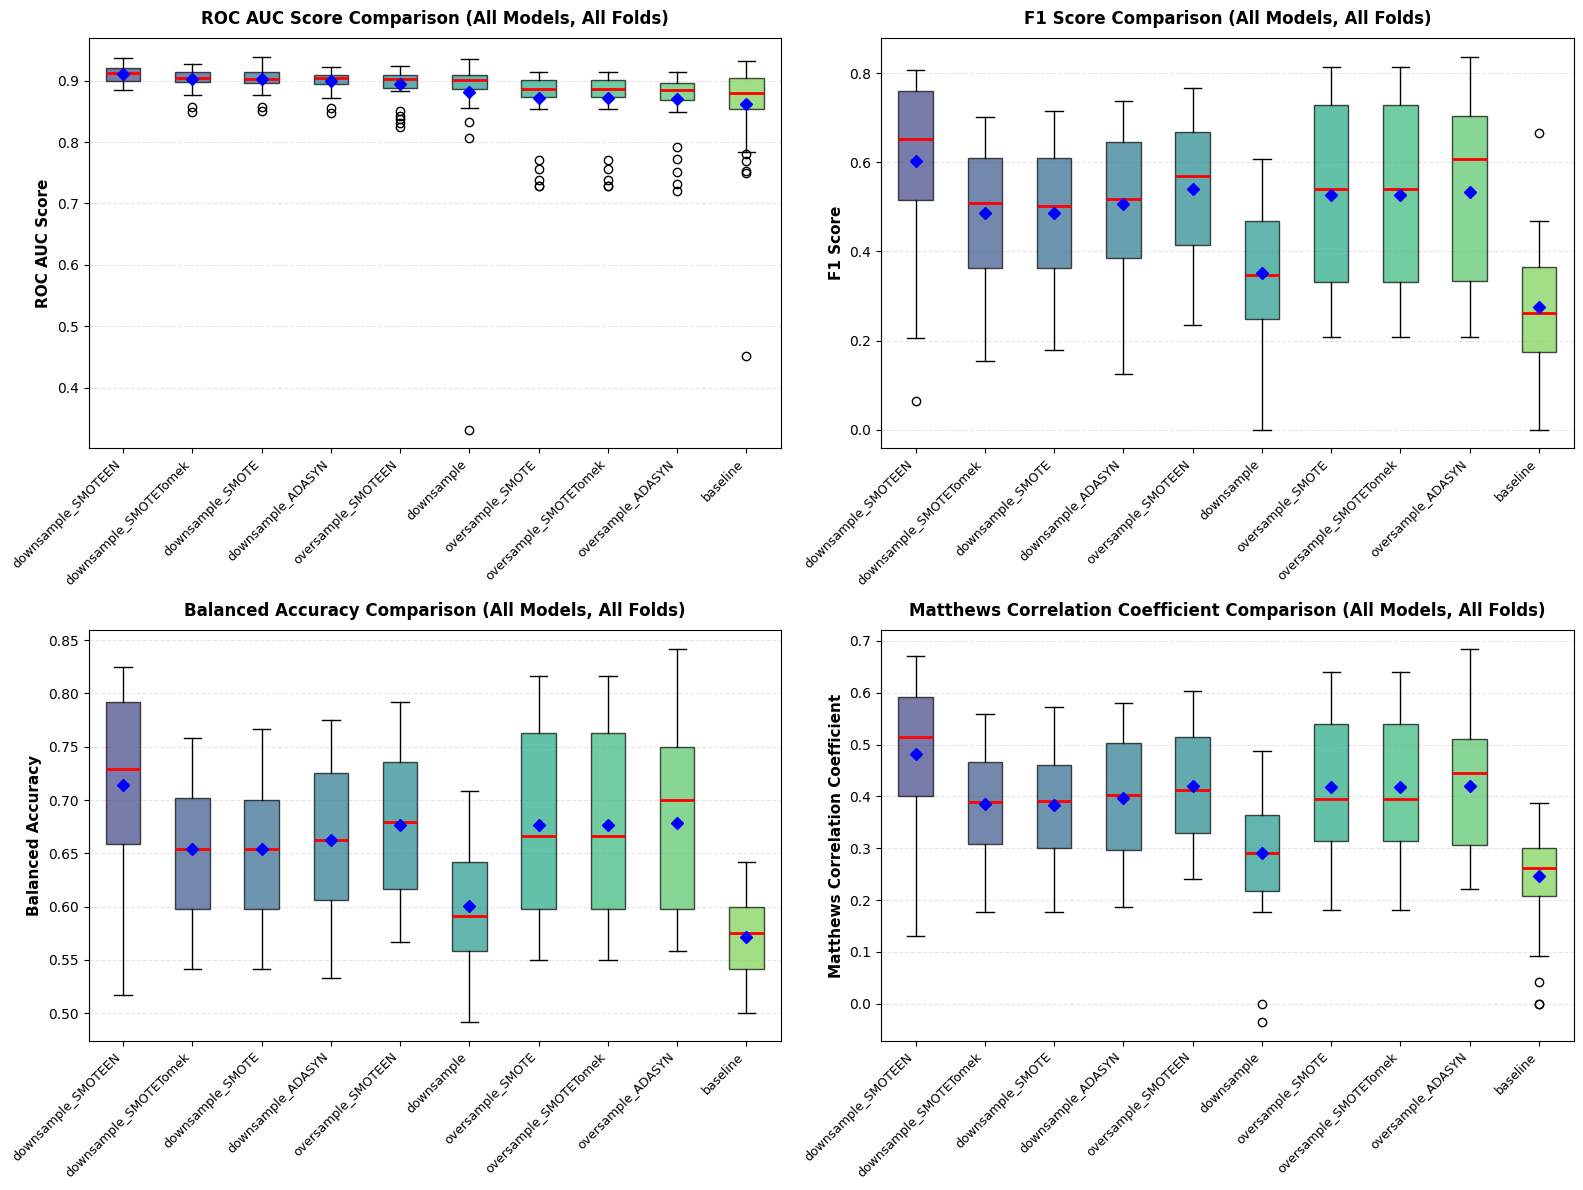


📊 Boxplot 설명:
  - 상자(Box): Q1(25%), 중앙값(50%), Q3(75%)
  - 수염(Whisker): 1.5 IQR 범위
  - 빨간 선: 중앙값
  - 파란 다이아몬드: 평균값
  - 점: 이상치(Outliers)


In [10]:
# Visualize performance comparison by sampling method using boxplot
if len(df_sampling_comparison) > 0 and 'sampling_metrics' in locals():
    # Visualize main metrics using boxplot
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    metrics_to_plot = [
        ('aucs', 'ROC_AUC', 'ROC AUC Score'),
        ('f1s', 'F1', 'F1 Score'),
        ('bal_accs', 'Balanced_Accuracy', 'Balanced Accuracy'),
        ('mccs', 'MCC', 'Matthews Correlation Coefficient')
    ]
    
    for idx, (metric_key, metric_col, metric_name) in enumerate(metrics_to_plot):
        ax = axes[idx]
        
        # 각 샘플링 방법별로 메트릭 값 수집
        boxplot_data = []
        sampling_labels = []
        
        # ROC AUC 기준으로 정렬된 순서대로 처리
        sorted_sampling_methods = df_sampling_comparison.sort_values(by="ROC_AUC_mean", ascending=False).index
        
        for sampling_method in sorted_sampling_methods:
            if sampling_method in sampling_metrics and metric_key in sampling_metrics[sampling_method]:
                values = sampling_metrics[sampling_method][metric_key]
                if len(values) > 0:
                    boxplot_data.append(values)
                    sampling_labels.append(sampling_method)
        
        if len(boxplot_data) == 0:
            ax.text(0.5, 0.5, 'No data available', 
                   ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title(f'{metric_name} Comparison', fontsize=12, fontweight='bold', pad=10)
            continue
        
        # Boxplot 생성
        bp = ax.boxplot(boxplot_data, labels=sampling_labels, vert=True, 
                       patch_artist=True, showmeans=True, meanline=False,
                       showfliers=True, whis=1.5)
        
        # 색상 설정 (성능 순서대로 그라데이션)
        colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(bp['boxes'])))
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        # 중앙값, 평균선 스타일 설정
        for median in bp['medians']:
            median.set_color('red')
            median.set_linewidth(2)
        
        for mean in bp['means']:
            mean.set_marker('D')
            mean.set_markerfacecolor('blue')
            mean.set_markeredgecolor('blue')
            mean.set_markersize(6)
        
        # X축 레이블 회전
        ax.set_xticklabels(sampling_labels, rotation=45, ha='right', fontsize=9)
        
        # Y축 레이블
        ax.set_ylabel(metric_name, fontsize=11, fontweight='bold')
        ax.set_title(f'{metric_name} Comparison (All Models, All Folds)', 
                    fontsize=12, fontweight='bold', pad=10)
        
        # 그리드
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        # 평균값 표시(수치값 표시 제외, 아무것도 하지 않음)
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Boxplot 설명:")
    print("  - 상자(Box): Q1(25%), 중앙값(50%), Q3(75%)")
    print("  - 수염(Whisker): 1.5 IQR 범위")
    print("  - 빨간 선: 중앙값")
    print("  - 파란 다이아몬드: 평균값")
    print("  - 점: 이상치(Outliers)")
        
else:
    print("⚠️  No sampling method data available for comparison.")
    print("   (sampling_metrics 변수가 필요합니다. 샘플링 방법별 비교 셀을 먼저 실행해주세요.)")


## 2. ROC 곡선 비교


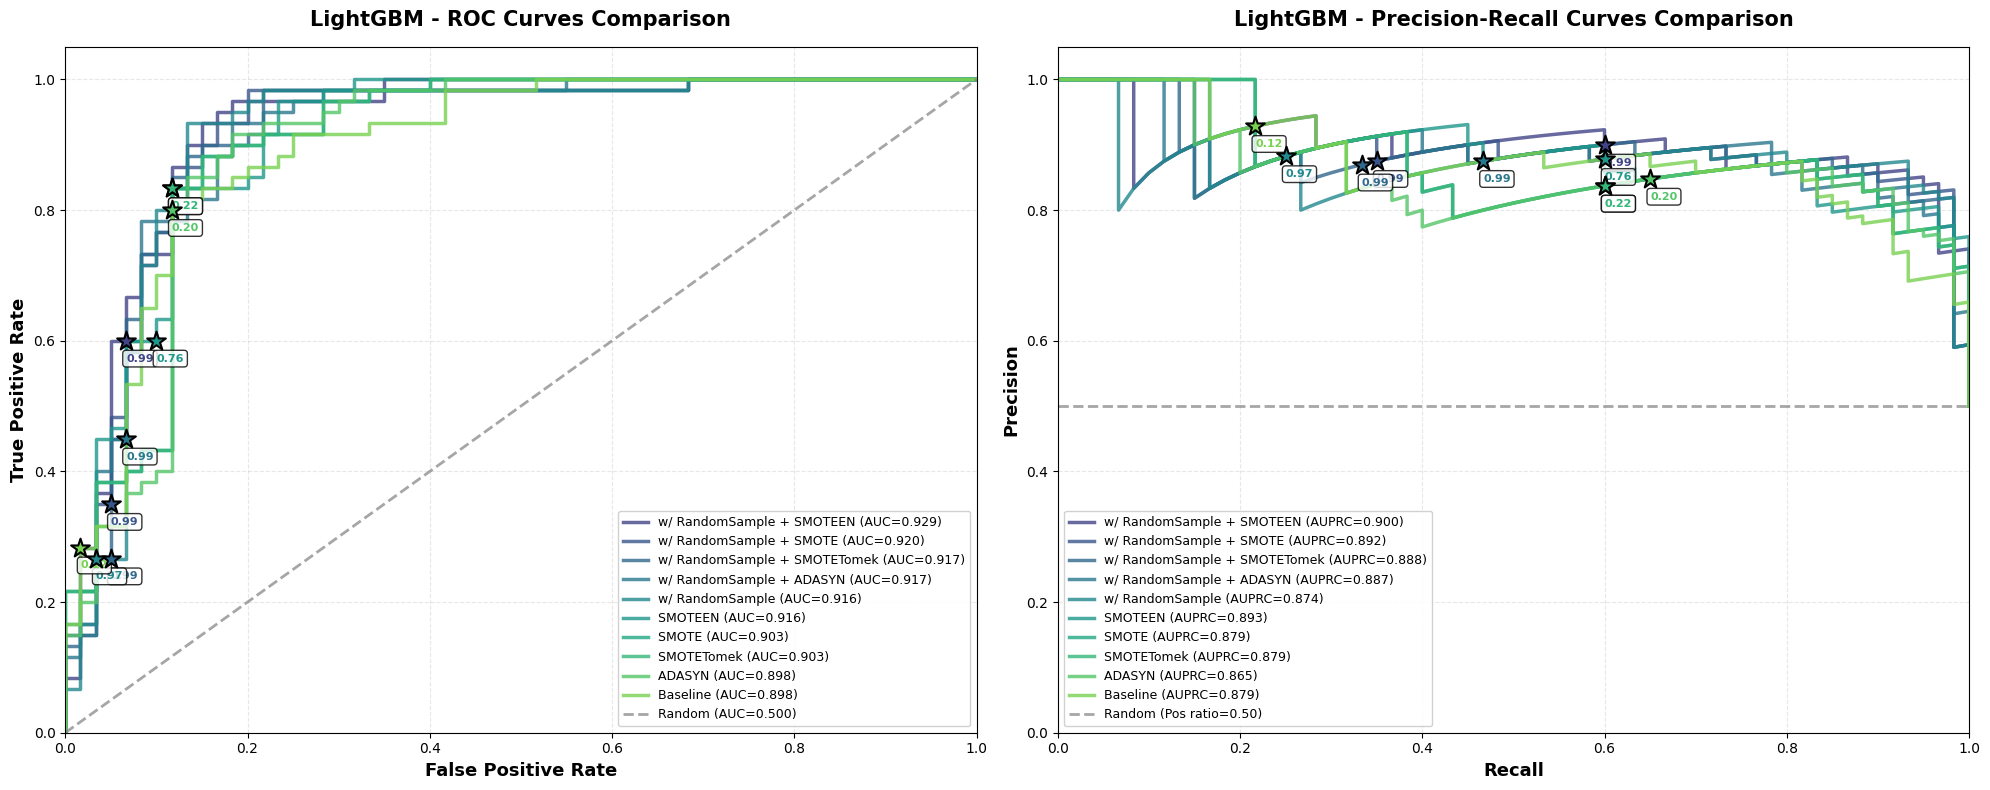

LightGBM 모델 - 샘플링 방법별 ROC AUC 비교
순위    샘플링 방법                                   ROC AUC    Best Threshold 
--------------------------------------------------------------------------------
1     w/ RandomSample + SMOTEEN                0.9294     0.9950         
2     w/ RandomSample + SMOTE                  0.9197     0.9930         
3     w/ RandomSample + SMOTETomek             0.9172     0.9930         
4     w/ RandomSample + ADASYN                 0.9167     0.9859         
5     w/ RandomSample                          0.9161     0.9698         
6     SMOTEEN                                  0.9156     0.7558         
7     SMOTE                                    0.9033     0.2171         
8     SMOTETomek                               0.9033     0.2171         
9     ADASYN                                   0.8983     0.2000         
10    Baseline                                 0.8981     0.1186         

총 10개 샘플링 방법의 ROC 곡선 표시 완료


In [18]:
# LightGBM 모델의 샘플링 방법별 ROC 곡선 비교
# 각 fold에서 validation set에서 찾은 best threshold를 사용 (fold_thresholds)

target_model = 'LightGBM'

def format_sampling_label(sampling_method):
    """샘플링 방법 이름을 레전드용으로 포맷팅"""
    if sampling_method.startswith('downsample_'):
        method = sampling_method.replace('downsample_', '')
        return f'w/ RandomSample + {method}'
    elif sampling_method.startswith('oversample_'):
        method = sampling_method.replace('oversample_', '')
        return f'{method}'
    elif sampling_method == 'downsample':
        return 'w/ RandomSample'
    elif sampling_method == 'baseline':
        return 'Baseline'
    else:
        return sampling_method

# LightGBM 모델의 샘플링 방법별 조합 수집
lightgbm_combinations = []
for sampling_name, result in results_dict.items():
    sampling_method = result.get('sampling_method', sampling_name.replace('models_comparison_', ''))
    test_labels = result['test_labels']
    test_proba = result.get('test_proba', {})
    fold_thresholds = result.get('fold_thresholds', {})
    
    if not isinstance(test_proba, dict):
        continue
    
    # LightGBM 모델만 선택
    if target_model not in test_proba:
        continue
    
    if target_model not in fold_thresholds:
        continue
    
    lightgbm_combinations.append((
        sampling_method,  # 원본 이름 (정렬용)
        format_sampling_label(sampling_method),  # 포맷된 이름 (레전드용)
        test_labels, 
        test_proba[target_model], 
        fold_thresholds[target_model]
    ))

if len(lightgbm_combinations) == 0:
    print(f"⚠️  {target_model} 모델의 ROC 곡선을 그릴 데이터가 없습니다.")
else:
    # AUC 기준으로 정렬
    auc_scores = []
    for sampling_method, formatted_label, test_labels, test_proba_list, threshold_list in lightgbm_combinations:
        if isinstance(test_proba_list, list) and len(test_proba_list) > 0:
            test_proba_array = np.array(test_proba_list)
            avg_test_proba = np.mean(test_proba_array, axis=0)
            auc = roc_auc_score(test_labels, avg_test_proba)
            auc_scores.append((sampling_method, formatted_label, auc))
    
    # AUC 기준으로 정렬
    auc_scores.sort(key=lambda x: x[2], reverse=True)
    sorted_sampling_methods = [x[0] for x in auc_scores]
    
    # 정렬된 순서대로 재구성
    sorted_combinations = []
    for sampling_method in sorted_sampling_methods:
        for combo in lightgbm_combinations:
            if combo[0] == sampling_method:
                sorted_combinations.append(combo)
                break
    
    # 1x2 subplot 생성: ROC 곡선과 PR 곡선
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(sorted_combinations)))
    
    # ROC 곡선과 PR 곡선을 위한 데이터 저장
    from sklearn.metrics import precision_recall_curve, average_precision_score
    
    for idx, (sampling_method, formatted_label, test_labels, test_proba_list, threshold_list) in enumerate(sorted_combinations):
        if not isinstance(test_proba_list, list) or len(test_proba_list) == 0:
            continue
        
        if not isinstance(threshold_list, list):
            threshold_list = [threshold_list]
        
        # Fold별 평균 확률 (Soft Voting)
        test_proba_array = np.array(test_proba_list)  # (n_folds, n_samples)
        avg_test_proba = np.mean(test_proba_array, axis=0)
        
        # 각 fold의 validation best threshold의 평균 사용
        best_thr = np.mean(threshold_list)
        
        # ========== ROC 곡선 (왼쪽 subplot) ==========
        ax_roc = axes[0]
        
        # test set의 ROC 곡선
        fpr, tpr, thresholds_roc = roc_curve(test_labels, avg_test_proba)
        auc = roc_auc_score(test_labels, avg_test_proba)
        
        # best_thr (validation fold threshold 평균) 위치 찾기
        idx_thr = np.argmin(np.abs(thresholds_roc - best_thr))
        best_fpr = fpr[idx_thr]
        best_tpr = tpr[idx_thr]
        
        # 레이블 생성 (포맷된 이름과 AUC 포함)
        label = f'{formatted_label} (AUC={auc:.3f})'
        
        # ROC Curve plot
        ax_roc.plot(fpr, tpr, lw=2.5, label=label, color=colors[idx], alpha=0.8)
        # validation best threshold 위치에 ★ 표시
        ax_roc.scatter(best_fpr, best_tpr, marker='*', s=200, color=colors[idx], 
                      edgecolors='black', linewidths=1.5, zorder=10)
        
        # threshold 주석
        ax_roc.annotate(f'{best_thr:.2f}', (best_fpr, best_tpr), 
                       textcoords="offset points", xytext=(10,-15), ha='center', 
                       color=colors[idx], fontsize=8, fontweight='bold',
                       bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
        
        # ========== PR 곡선 (오른쪽 subplot) ==========
        ax_pr = axes[1]
        
        # Precision-Recall 곡선
        precision, recall, thresholds_pr = precision_recall_curve(test_labels, avg_test_proba)
        auprc = average_precision_score(test_labels, avg_test_proba)
        
        # best_thr 위치 찾기 (PR 곡선에서)
        # thresholds_pr는 n-1개, precision/recall은 n개 (맨 앞에 1.0 추가됨)
        idx_thr_pr = np.argmin(np.abs(thresholds_pr - best_thr))
        # precision/recall 인덱스는 thresholds 인덱스 + 1 (맨 앞 1.0 때문)
        if idx_thr_pr < len(thresholds_pr):
            best_prec = precision[idx_thr_pr + 1]
            best_rec = recall[idx_thr_pr + 1]
        else:
            # 범위를 벗어나면 마지막 값 사용
            best_prec = precision[-1]
            best_rec = recall[-1]
        
        # PR Curve plot
        label_pr = f'{formatted_label} (AUPRC={auprc:.3f})'
        ax_pr.plot(recall, precision, lw=2.5, label=label_pr, color=colors[idx], alpha=0.8)
        # best threshold 위치에 ★ 표시
        ax_pr.scatter(best_rec, best_prec, marker='*', s=200, color=colors[idx], 
                     edgecolors='black', linewidths=1.5, zorder=10)
        
        # threshold 주석
        ax_pr.annotate(f'{best_thr:.2f}', (best_rec, best_prec), 
                      textcoords="offset points", xytext=(10,-15), ha='center', 
                      color=colors[idx], fontsize=8, fontweight='bold',
                      bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    # ========== ROC 곡선 설정 ==========
    ax_roc.plot([0, 1], [0, 1], '--', color='gray', lw=2, label='Random (AUC=0.500)', alpha=0.7)
    ax_roc.set_xlim([0.0, 1.0])
    ax_roc.set_ylim([0.0, 1.05])
    ax_roc.set_xlabel('False Positive Rate', fontsize=13, fontweight='bold')
    ax_roc.set_ylabel('True Positive Rate', fontsize=13, fontweight='bold')
    ax_roc.set_title(f'{target_model} - ROC Curves Comparison', 
                     fontsize=15, fontweight='bold', pad=15)
    ax_roc.legend(loc='lower right', fontsize=9, framealpha=0.9)
    ax_roc.grid(True, alpha=0.3, linestyle='--')
    
    # ========== PR 곡선 설정 ==========
    # 랜덤 분류기의 베이스라인 (양성 비율)
    pos_ratio = np.mean(test_labels)
    ax_pr.hlines(pos_ratio, 0, 1, colors='gray', linestyles='--', 
                label=f'Random (Pos ratio={pos_ratio:.2f})', lw=2, alpha=0.7)
    ax_pr.set_xlim([0.0, 1.0])
    ax_pr.set_ylim([0.0, 1.05])
    ax_pr.set_xlabel('Recall', fontsize=13, fontweight='bold')
    ax_pr.set_ylabel('Precision', fontsize=13, fontweight='bold')
    ax_pr.set_title(f'{target_model} - Precision-Recall Curves Comparison', 
                    fontsize=15, fontweight='bold', pad=15)
    ax_pr.legend(loc='lower left', fontsize=9, framealpha=0.9)
    ax_pr.grid(True, alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.show()
    
    # 요약 정보 출력
    print("="*80)
    print(f"{target_model} 모델 - 샘플링 방법별 ROC AUC 비교")
    print("="*80)
    print(f"{'순위':<5} {'샘플링 방법':<40} {'ROC AUC':<10} {'Best Threshold':<15}")
    print("-"*80)
    for rank, (sampling_method, formatted_label, auc) in enumerate(auc_scores, 1):
        # 해당 샘플링 방법의 threshold 찾기
        best_thr = None
        for combo in sorted_combinations:
            if combo[0] == sampling_method:
                threshold_list = combo[4]
                if not isinstance(threshold_list, list):
                    threshold_list = [threshold_list]
                best_thr = np.mean(threshold_list)
                break
        
        print(f"{rank:<5} {formatted_label:<40} {auc:<10.4f} {best_thr:<15.4f}")
    
    print(f"\n총 {len(sorted_combinations)}개 샘플링 방법의 ROC 곡선 표시 완료")


## 3. Confusion Matrix 비교


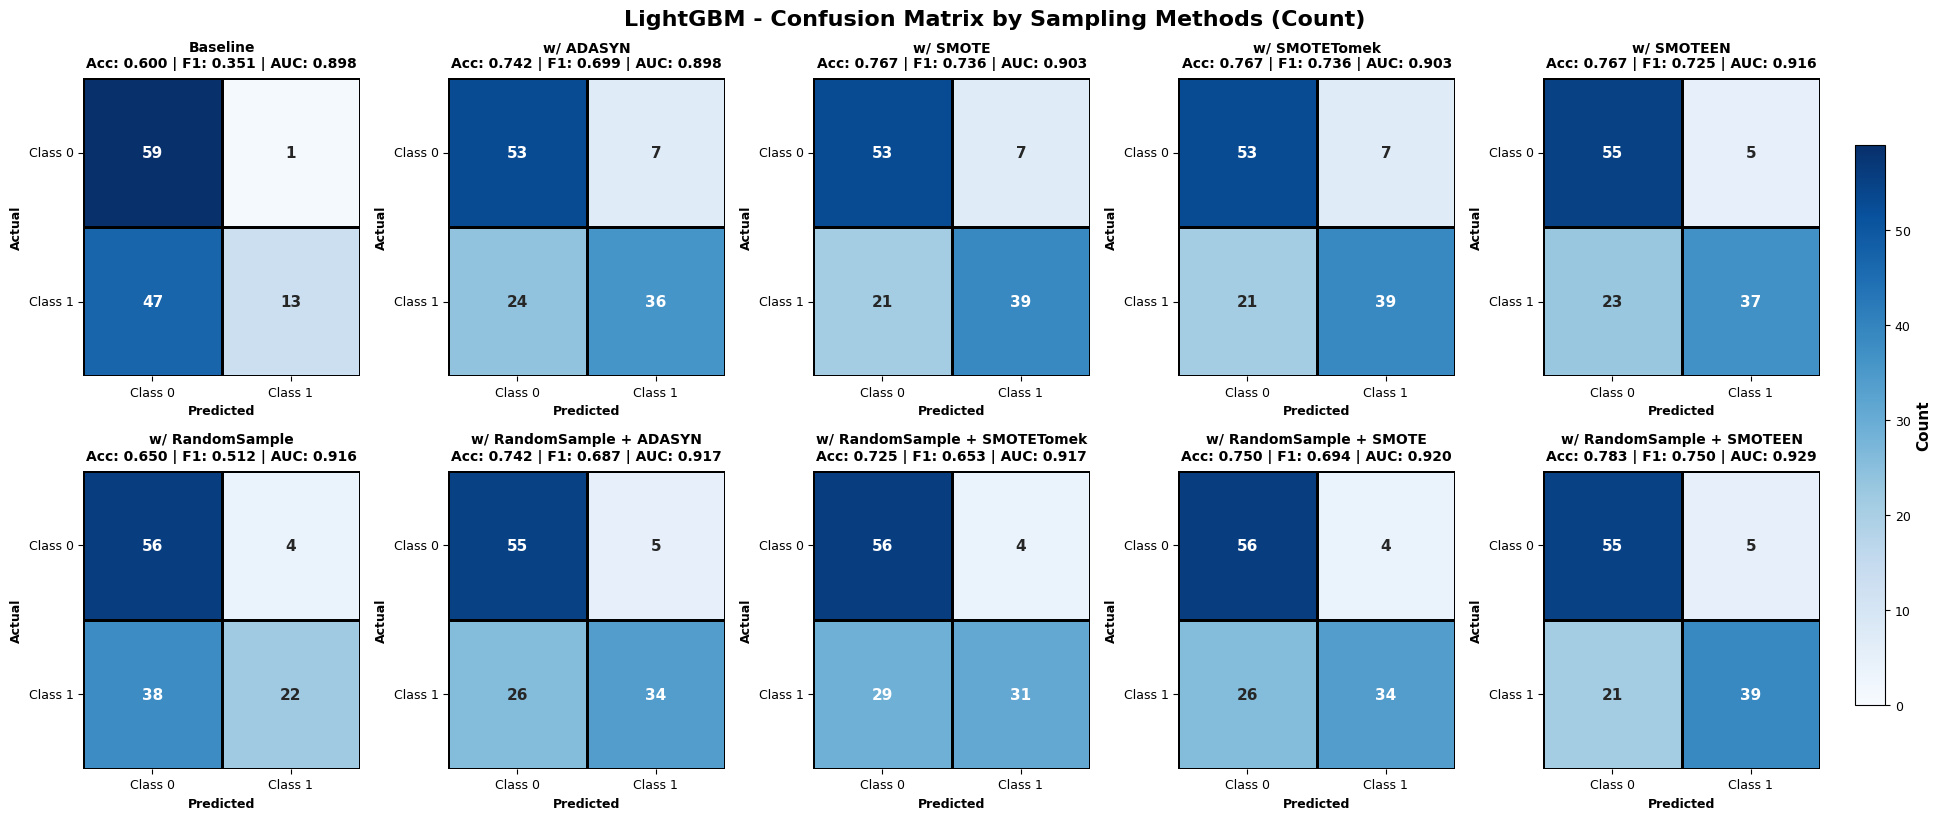

LightGBM 모델 - 샘플링 방법별 Confusion Matrix 분석
순위    샘플링 방법                              Accuracy   Precision  Recall     F1         AUC       
--------------------------------------------------------------------------------
1     Baseline                            0.6000     0.9286     0.2167     0.3514     0.8981    
2     w/ ADASYN                           0.7417     0.8372     0.6000     0.6990     0.8983    
3     w/ SMOTE                            0.7667     0.8478     0.6500     0.7358     0.9033    
4     w/ SMOTETomek                       0.7667     0.8478     0.6500     0.7358     0.9033    
5     w/ SMOTEEN                          0.7667     0.8810     0.6167     0.7255     0.9156    
6     w/ RandomSample                     0.6500     0.8462     0.3667     0.5116     0.9161    
7     w/ RandomSample + ADASYN            0.7417     0.8718     0.5667     0.6869     0.9167    
8     w/ RandomSample + SMOTETomek        0.7250     0.8857     0.5167     0.6526     0.9172    
9   

In [27]:
# LightGBM 모델의 샘플링 방법별 Confusion Matrix 시각화
target_model = 'LightGBM'

def format_sampling_label(sampling_method):
    """샘플링 방법 이름을 레전드용으로 포맷팅"""
    if sampling_method.startswith('downsample_'):
        method = sampling_method.replace('downsample_', '')
        return f'w/ RandomSample + {method}'
    elif sampling_method.startswith('oversample_'):
        method = sampling_method.replace('oversample_', '')
        return f'w/ {method}'
    elif sampling_method == 'downsample':
        return 'w/ RandomSample'
    elif sampling_method == 'baseline':
        return 'Baseline'
    else:
        return sampling_method

# LightGBM 모델의 모든 샘플링 방법별 조합 수집
lightgbm_combinations = []
for sampling_name, result in results_dict.items():
    sampling_method = result.get('sampling_method', sampling_name.replace('models_comparison_', ''))
    test_labels = result['test_labels']
    test_preds = result.get('test_preds', {})
    
    if not isinstance(test_preds, dict):
        continue
    
    if target_model not in test_preds:
        continue
    
    preds_list = test_preds[target_model]
    if isinstance(preds_list, list) and len(preds_list) > 0:
        lightgbm_combinations.append((sampling_method, test_labels, preds_list))

if len(lightgbm_combinations) == 0:
    print(f"⚠️  {target_model} 모델의 데이터가 없습니다.")
else:
    # AUC 기준으로 정렬 (ROC 곡선과 동일한 순서)
    auc_scores = []
    for sampling_method, test_labels, preds_list in lightgbm_combinations:
        # AUC 계산을 위해 test_proba 필요
        for sampling_name, result in results_dict.items():
            sm = result.get('sampling_method', sampling_name.replace('models_comparison_', ''))
            if sm == sampling_method:
                test_proba = result.get('test_proba', {})
                if target_model in test_proba:
                    proba_list = test_proba[target_model]
                    if isinstance(proba_list, list) and len(proba_list) > 0:
                        proba_array = np.array(proba_list)
                        avg_proba = np.mean(proba_array, axis=0)
                        auc = roc_auc_score(test_labels, avg_proba)
                        auc_scores.append((sampling_method, auc))
                        break
    
    # AUC 기준으로 정렬 (baseline 제외)
    baseline_combo = None
    other_combos = []
    other_auc_scores = []
    
    for sampling_method, test_labels, preds_list in lightgbm_combinations:
        if sampling_method == 'baseline':
            baseline_combo = (sampling_method, test_labels, preds_list)
        else:
            # AUC 계산
            for sampling_name, result in results_dict.items():
                sm = result.get('sampling_method', sampling_name.replace('models_comparison_', ''))
                if sm == sampling_method:
                    test_proba = result.get('test_proba', {})
                    if target_model in test_proba:
                        proba_list = test_proba[target_model]
                        if isinstance(proba_list, list) and len(proba_list) > 0:
                            proba_array = np.array(proba_list)
                            avg_proba = np.mean(proba_array, axis=0)
                            auc = roc_auc_score(test_labels, avg_proba)
                            other_auc_scores.append((sampling_method, auc, test_labels, preds_list))
                            break
    
    # 성능 순서대로 정렬 (AUC 높은 순)
    other_auc_scores.sort(key=lambda x: x[1], reverse=True)
    
    # baseline의 AUC 계산
    baseline_auc = 0.0
    if baseline_combo:
        baseline_method, baseline_labels, baseline_preds = baseline_combo
        for sampling_name, result in results_dict.items():
            sm = result.get('sampling_method', sampling_name.replace('models_comparison_', ''))
            if sm == 'baseline':
                test_proba = result.get('test_proba', {})
                if target_model in test_proba:
                    proba_list = test_proba[target_model]
                    if isinstance(proba_list, list) and len(proba_list) > 0:
                        proba_array = np.array(proba_list)
                        avg_proba = np.mean(proba_array, axis=0)
                        baseline_auc = roc_auc_score(baseline_labels, avg_proba)
                        break
    
    # 2x5 레이아웃: 오른쪽 밑(마지막 위치)에 최고 성능 배치
    # 첫 번째 행: 나머지 5개 (낮은 성능부터)
    # 두 번째 행: 나머지 4개 + 최고 성능(마지막 위치)
    cols = 5
    rows = 2
    
    # 레이아웃에 맞게 재배치
    layout_combinations = []
    layout_auc_values = []
    
    # other_auc_scores는 이미 내림차순 정렬됨 (높은 순)
    # 최고 성능은 마지막 위치(인덱스 9)에 배치
    # 나머지는 앞에서부터 순서대로 배치
    
    # baseline과 other 조합을 합치기
    all_combos_with_auc = []
    if baseline_combo:
        all_combos_with_auc.append(('baseline', baseline_auc, baseline_combo[1], baseline_combo[2]))
    
    for sm, auc, tl, pl in other_auc_scores:
        all_combos_with_auc.append((sm, auc, tl, pl))
    
    # AUC 기준으로 정렬 (최고 성능이 마지막에 오도록)
    all_combos_with_auc.sort(key=lambda x: x[1], reverse=True)
    
    # 최고 성능을 마지막 위치에 배치하고, 나머지를 앞에서부터 채우기
    if len(all_combos_with_auc) > 0:
        # 최고 성능 (첫 번째)
        best_combo = all_combos_with_auc[0]
        # 나머지 (2번째부터)
        rest_combos = all_combos_with_auc[1:]
        
        # 레이아웃 채우기: 나머지를 먼저 채우고, 마지막에 최고 성능 배치
        # 총 10개 위치: 0-9 (마지막 9번이 오른쪽 밑)
        total_slots = rows * cols  # 10
        
        # 나머지를 앞에서부터 채우기 (낮은 성능부터)
        rest_combos_sorted = sorted(rest_combos, key=lambda x: x[1])  # 낮은 순서대로
        
        for i in range(min(len(rest_combos_sorted), total_slots - 1)):
            sm, auc, tl, pl = rest_combos_sorted[i]
            layout_combinations.append((sm, tl, pl))
            layout_auc_values.append(auc)
        
        # 마지막 위치에 최고 성능 배치
        sm, auc, tl, pl = best_combo
        layout_combinations.append((sm, tl, pl))
        layout_auc_values.append(auc)
    
    # 2x5 레이아웃 생성
    fig, axes = plt.subplots(rows, cols, figsize=(20, 8))
    axes = axes.flatten()
    
    # 모든 Confusion Matrix의 최대값 찾기 (공통 colorbar를 위해)
    all_cm_values = []
    for sampling_method, test_labels, preds_list in layout_combinations:
        preds_array = np.array(preds_list)
        hard_voting_pred = mode(preds_array, axis=0, keepdims=False).mode
        cm = confusion_matrix(test_labels, hard_voting_pred)
        all_cm_values.append(cm)
    
    vmin = 0
    vmax = max([cm.max() for cm in all_cm_values])
    
    # 각 샘플링 방법별 Confusion Matrix 그리기 (모두 cbar=False로 설정)
    for idx, (sampling_method, test_labels, preds_list) in enumerate(layout_combinations):
        formatted_label = format_sampling_label(sampling_method)
        
        # Hard Voting (Majority Vote)
        preds_array = np.array(preds_list)  # (n_folds, n_samples)
        hard_voting_pred = mode(preds_array, axis=0, keepdims=False).mode
        
        # Confusion Matrix 계산 (개수)
        cm = confusion_matrix(test_labels, hard_voting_pred)
        
        # 메트릭 계산
        accuracy = accuracy_score(test_labels, hard_voting_pred)
        precision = precision_score(test_labels, hard_voting_pred, zero_division=0)
        recall = recall_score(test_labels, hard_voting_pred, zero_division=0)
        f1 = f1_score(test_labels, hard_voting_pred, zero_division=0)
        
        # 시각화
        ax = axes[idx]
        
        # Confusion Matrix 히트맵 (개수, colorbar 없이)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, 
                    cbar=False, linewidths=2, linecolor='black', vmin=vmin, vmax=vmax,
                    annot_kws={'size': 11, 'weight': 'bold'})
        
        # 제목 설정 (AUC 포함)
        auc_val = layout_auc_values[idx] if idx < len(layout_auc_values) else 0.0
        ax.set_title(f'{formatted_label}\nAcc: {accuracy:.3f} | F1: {f1:.3f} | AUC: {auc_val:.3f}', 
                     fontsize=10, fontweight='bold', pad=8)
        ax.set_xlabel('Predicted', fontsize=9, fontweight='bold')
        ax.set_ylabel('Actual', fontsize=9, fontweight='bold')
        ax.set_xticklabels(['Class 0', 'Class 1'], fontsize=9)
        ax.set_yticklabels(['Class 0', 'Class 1'], fontsize=9, rotation=0)
    
    # 사용하지 않는 subplot 제거
    for idx in range(len(layout_combinations), len(axes)):
        fig.delaxes(axes[idx])
    
    # 공통 colorbar를 오른쪽에 추가 (2행 전체를 커버하도록)
    # tight_layout 전에 colorbar 공간 확보
    plt.tight_layout(rect=[0, 0, 0.92, 1.0])  # [left, bottom, right, top]
    
    # colorbar를 위한 axes 생성 (전체 2행 높이에 맞춤)
    cbar_ax = fig.add_axes([0.93, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
    
    # 공통 colorbar 생성 (임의의 데이터로 생성)
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=cbar_ax)
    cbar.set_label('Count', fontsize=11, fontweight='bold')
    cbar.ax.tick_params(labelsize=9)
    
    plt.suptitle(f'{target_model} - Confusion Matrix by Sampling Methods (Count)', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()
    
    # 상세 메트릭 출력
    print("="*80)
    print(f"{target_model} 모델 - 샘플링 방법별 Confusion Matrix 분석")
    print("="*80)
    print(f"{'순위':<5} {'샘플링 방법':<35} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1':<10} {'AUC':<10}")
    print("-"*80)
    
    for rank, (sampling_method, test_labels, preds_list) in enumerate(layout_combinations, 1):
        formatted_label = format_sampling_label(sampling_method)
        
        # Hard Voting
        preds_array = np.array(preds_list)
        hard_voting_pred = mode(preds_array, axis=0, keepdims=False).mode
        
        # 메트릭 계산
        accuracy = accuracy_score(test_labels, hard_voting_pred)
        precision = precision_score(test_labels, hard_voting_pred, zero_division=0)
        recall = recall_score(test_labels, hard_voting_pred, zero_division=0)
        f1 = f1_score(test_labels, hard_voting_pred, zero_division=0)
        auc_val = layout_auc_values[rank-1] if rank <= len(layout_auc_values) else 0.0
        
        print(f"{rank:<5} {formatted_label:<35} {accuracy:<10.4f} {precision:<10.4f} {recall:<10.4f} {f1:<10.4f} {auc_val:<10.4f}")
    
    print(f"\n✅ 총 {len(layout_combinations)}개 샘플링 방법의 Confusion Matrix 표시 완료")
